In [1]:
from notebook_env import *
import json

In [2]:
colors = [
    'chocolate',
    'lightsteelblue',
    'orange',
]

models_sizes = {0:'7B',1:'13B',2:'70B'}
dataset_names = {'heval':'HumanEval','mbpp':'MBPP'}
contract_names = {'rob':'cost-robust','aware':'cost-aware'}

## Data

In [3]:
binary = (
    pd.read_csv('./results/binary_F.csv')
    .rename(models_sizes)
    .rename(dataset_names,axis=1)
    .pipe(lambda df:df/100)
)
binary

,HumanEval,MBPP
7B,0.335,0.414
13B,0.360,0.470
70B,0.530,0.624


In [4]:
mtbench = (
    pd.read_csv('./results/mtbench_F.csv')
    .rename({0:'7B',1:'13B',2:'70B'})
    .rename(lambda i: int(i)+1, axis=1)
)
mtbench

,1,2,3,4,5,6,7,8,9,10
7B,0.15625,0.16875,0.03750,0.00625,0.00000,0.04375,0.05000,0.1125,0.13750,0.28750
13B,0.16875,0.13750,0.01250,0.00000,0.00625,0.04375,0.05625,0.0500,0.16875,0.35625
70B,0.09375,0.18750,0.01875,0.00625,0.00625,0.03750,0.06250,0.0750,0.11875,0.39375


In [5]:
tb_df = (
    pd.DataFrame([
        {
            'benchmark': k.split('_')[0],
            'type': k.split('_')[1],
            'pay': v[1],
        }
        for k,v in json.load(open('./results/binary_contracts.json','r')).items()
    ])
    .pivot(
        index='benchmark',
        columns='type',
        values='pay',
    )
    .rename({'heval':'HumanEval','mbpp':'MBPP'},axis=0)
    .rename({'rob':'cost-robust','aware':'cost-aware'},axis=1)
)
tb_df

type,cost-aware,cost-robust
benchmark,,
HumanEval,2.353077,2.699118
MBPP,2.590909,2.979545


In [6]:
mt_df = (
    pd.DataFrame(json.load(open('./results/mtbench_contracts.json','r')))
    .stack()
    .apply(pd.Series)
)
mt_df

0             1             2  \
min-pay      t_opt_thresh_aware    0.0  0.000000e+00  0.000000e+00   
             t_opt_thresh_rob      0.0  0.000000e+00  0.000000e+00   
             t_opt_monotone_aware  0.0  8.291411e-09  8.412124e-09   
             t_opt_monotone_rob    0.0  9.457857e-09  9.520179e-09   
min-budget   t_opt_thresh_aware    0.0  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      0.0  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  0.0  4.477667e+00  4.477667e+00   
             t_opt_monotone_rob    0.0  5.608167e+00  5.608167e+00   
min-variance t_opt_thresh_aware    0.0  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      0.0  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  0.0  4.477741e+00  4.477755e+00   
             t_opt_monotone_rob    0.0  5.608075e+00  5.608057e+00   

                                              3             4             5  \
min-pay      t_opt_thresh_aware    0.000000e+00  0.000000e+00  0.000000e+00   
             t_opt_thresh_rob      0.000000e+00  0.000000e+00  0.000000e+00   
             t_opt_monotone_aware  8.475942e-09  8.484088e-09  8.480226e-09   
             t_opt_monotone_rob    9.528144e-09  9.481196e-09  9.420729e-09   
min-budget   t_opt_thresh_aware    7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  4.477667e+00  4.477667e+00  4.477667e+00   
             t_opt_monotone_rob    5.608167e+00  5.608167e+00  5.608167e+00   
min-variance t_opt_thresh_aware    7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  4.477775e+00  4.477797e+00  4.477817e+00   
             t_opt_monotone_rob    5.608032e+00  5.608004e+00  5.607979e+00   

                                              6             7             8  \
min-pay      t_opt_thresh_aware    0.000000e+00  0.000000e+00  0.000000e+00   
             t_opt_thresh_rob      0.000000e+00  0.000000e+00  0.000000e+00   
             t_opt_monotone_aware  8.525211e-09  8.550343e-09  8.499493e-09   
             t_opt_monotone_rob    9.405116e-09  9.368852e-09  9.261140e-09   
min-budget   t_opt_thresh_aware    7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  4.477667e+00  4.477667e+00  4.477667e+00   
             t_opt_monotone_rob    5.608167e+00  5.608167e+00  5.608167e+00   
min-variance t_opt_thresh_aware    7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_thresh_rob      7.341600e+00  7.341600e+00  7.341600e+00   
             t_opt_monotone_aware  4.477835e+00  4.477848e+00  4.477870e+00   
             t_opt_monotone_rob    5.607956e+00  5.607940e+00  5.607913e+00   

                                           9  
min-pay      t_opt_thresh_aware    10.640000  
             t_opt_thresh_rob      12.236000  
             t_opt_monotone_aware  10.640000  
             t_opt_monotone_rob    12.236000  
min-budget   t_opt_thresh_aware     7.341600  
             t_opt_thresh_rob       7.341600  
             t_opt_monotone_aware   6.162333  
             t_opt_monotone_rob     6.627833  
min-variance t_opt_thresh_aware     7.341600  
             t_opt_thresh_rob       7.341600  
             t_opt_monotone_aware   6.162393  
             t_opt_monotone_rob     6.627758

## Plot

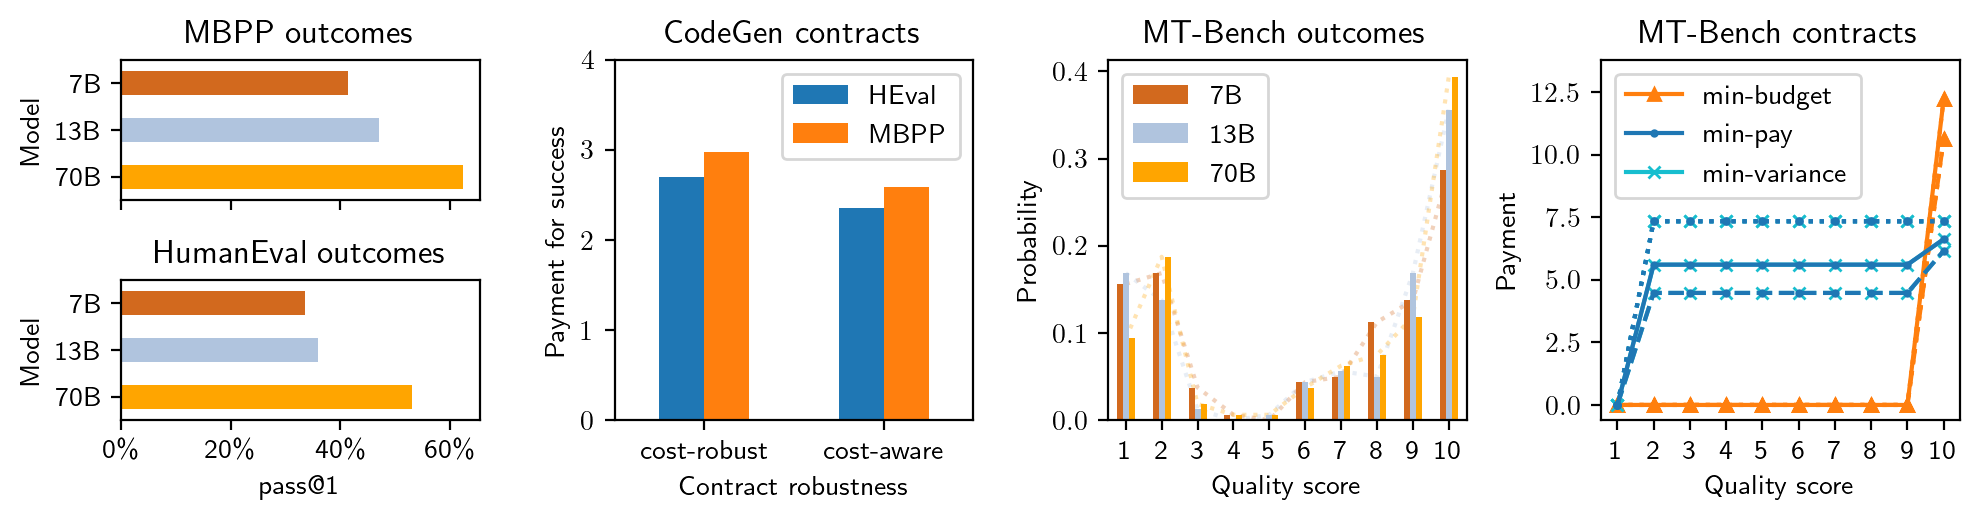

In [51]:
fig = plt.figure(
    figsize=(10,2.7),
    # tight_layout={'w_pad':2},
    layout='tight',
)

ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,5,sharex=ax1)
axs = [ax1, ax2]

for i in [0,1]:
    ax = axs[i]
    s = (
        binary
        .T
        .iloc[1-i,::-1]
    )
    s.plot.barh(
        ax=ax,
        color=colors[::-1],
        legend=None,
        title=f'{s.name} outcomes',
        ylabel='Model',
        xlabel='pass@1',
        # ylim=(0.0,0.66),
    )
    ax.tick_params(axis='x', labelrotation=0)

axs[1].xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1,decimals=0))

ax = fig.add_subplot(1,4,2)

(
    tb_df
    .rename({'HumanEval':'HEval'})
    .T
    .iloc[::-1]
    .plot.bar(
        ax=ax,
        # legend=None,
        title='CodeGen contracts',
        ylabel=r'Payment for success',
        xlabel='Contract robustness',
        ylim=(0,4),
    )
)
ax.tick_params(axis='x', labelrotation=0)
ax.legend(title=None)


ax = fig.add_subplot(1,4,3)
(
    mtbench
    # .rename(lambda size: f'Llama2-{size}')
    .T
    .plot.bar(
        ax=ax,
        color=colors,
        # legend=None,
        # marker='.',
    )
)
ax.legend(
    # title='Size',
    # loc
)
(
    mtbench
    .T
    .rename(lambda i: i-1)
    .plot.line(
        ax=ax,
        color=colors,
        legend=None,
        zorder=-1,
        alpha=0.3,
        linestyle=':',
        # marker='.',
    )
)
ax.set(
    title='MT-Bench outcomes',
    xlabel='Quality score',
    ylabel='Probability',
)
ax = fig.add_subplot(1,4,4)

contract_objectives = ['min-pay','min-budget','min-variance']
contract_types = ['t_opt_monotone_rob', 't_opt_thresh_aware', 't_opt_thresh_rob', 't_opt_monotone_aware']


obj_style = {
    'min-pay': {
        'marker': '^',
        'color': 'tab:orange',
        'zorder': -1,
    },
    'min-budget': {
        'marker': '.',
        'color': 'tab:blue',
    },
    'min-variance':{
        'marker': 'x',
        'color': 'tab:cyan',
        'zorder': -1,
    }
}

type_style = {
    'aware': {
        'linestyle':'--',
    },
    'rob': {},
}

constraint_style = {
    'monotone': {},
    'thresh': {'linestyle':':'},
}


for t in contract_types:
    
    for obj in contract_objectives:
        (
            mt_df
            .loc[(obj,t)]
            .T
            .plot.line(
                ax=ax,
                **(
                    obj_style[obj] |
                    type_style[t.split('_')[-1]] |
                    constraint_style[t.split('_')[-2]]
                ),
                ms=4,
            )
        )

ax.legend(['min-budget','min-pay','min-variance'])

ax.set(
    title='MT-Bench contracts',
    xlabel='Quality score',
    ylabel='Payment',
    xticks=np.arange(10),
    xticklabels=np.arange(10)+1,
    ylim=(None,13.8),
)

statcontracts.analysis.download_fig(fig,'empirical.pdf')
